<a href="https://colab.research.google.com/github/santoshreddy48/EECE5644-Fall-2019/blob/master/HW3_Solution2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solution2

In [0]:
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from matplotlib.pyplot import figure


In [0]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, ( y -h )) / y.size
            self.theta = self.theta - self.lr * gradient
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)   
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')


    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(z))

    def __loss(self, h, y):
        return (y * np.log(h) + (1 - y) * np.log(1 - h)).mean()
    
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

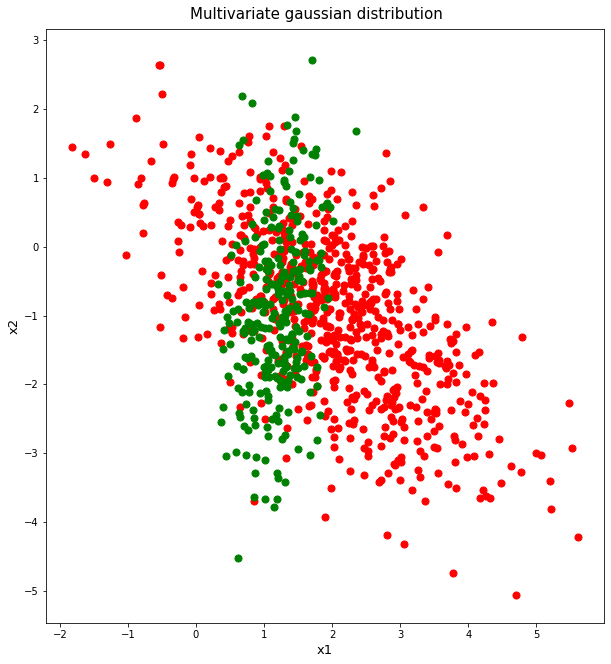

In [253]:
def generate_GMM_samples_2class(prior,number_of_samples,sig1,sig2,u1,u2):

    samples_class1=[]
    samples_class2=[]
    sig_1=np.matrix(sig1)
    u_1=np.matrix(u1).transpose()
    sig_2=np.matrix(sig2)
    u_2=np.matrix(u2).transpose()
    prior=prior
    A1=np.linalg.cholesky(sig_1)
    b1=u_1
    A2=np.linalg.cholesky(sig_2)
    b2=u_2
    zero_mean=[0,0]
    cov=[[1,0],[0,1]]
    for i in range(number_of_samples):
        uniform_sample=np.random.uniform()

        sample_from_zero_mean_identity_covariance=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()

        if uniform_sample<prior[0]:
           
            sample=A1.dot(sample_from_zero_mean_identity_covariance)+b1
            samples_class1.append(sample)
        elif (prior[0]<uniform_sample<prior[0]+prior[1]):
           
            sample=A2.dot(sample_from_zero_mean_identity_covariance)+b2
            samples_class2.append(sample)
    samples_class1_final=np.hstack(samples_class1)
    samples_class2_final=np.hstack(samples_class2)
    a=np.squeeze(np.asarray(samples_class1_final.transpose()[:,1]))
    b=np.squeeze(np.asarray(samples_class1_final.transpose()[:,0]))
    c=np.squeeze(np.asarray(samples_class2_final.transpose()[:,1]))
    d=np.squeeze(np.asarray(samples_class2_final.transpose()[:,0]))
    txt="Data from 4 gaussian distribution "
    fig = plt.figure(figsize=(10,10));
    plt.xlabel('x1',size=13)
    plt.ylabel('x2',size=13)
    fig.suptitle('Multivariate gaussian distribution', fontsize=15)
    plt.scatter(b,a,color='r',marker='o',label='class 1',s=50)
    plt.scatter(d,c,color='g',marker='o',label='class 2',s=50)
    X=np.hstack([samples_class1_final,samples_class2_final])
    plt.subplots_adjust(top=.95)
    y = np.hstack((np.zeros(samples_class1_final.shape[1]), np.ones(samples_class2_final.shape[1])))
    X=X.T
    X=np.squeeze(np.asarray(X))
    return X,y



X,y=generate_GMM_samples_2class([0.7,0.3],999,[[1.5,1],[-1,1.5]],[[.15,.1],[.1,1.5]],[2,-1],[1.2,-1]);


### True GMM

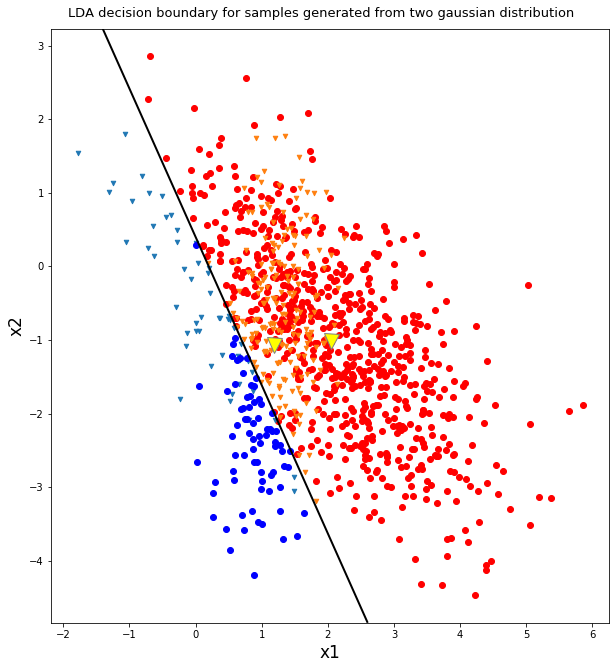

In [216]:

fig = plt.figure(figsize=(10,10));
fig.suptitle('LDA', fontsize=12)
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)
y_pred = lda.predict(X)

def plot_data(lda, X, y, y_pred):
    nx = 200
    ny = 100
    X0 = X[y == 0]
    X1 = X[y == 1] 
    tp = (y == y_pred)  
    tp0 = tp[y == 0]
    tp1 =  tp[y == 1] 
    X0_tp = X0[tp0]
    X0_fp = X0[~tp0]
    X1_tp = X1[tp1]
    X1_fp = X1[~tp1]
    plt.ylabel('x2',size=17)
    plt.xlabel('x1',size=17)
    fig.suptitle('LDA decision boundary for samples generated from two gaussian distribution', fontsize=13)
    plt.ylabel('x2',size=17)
    plt.xlabel('x1',size=17)
    fig.suptitle('LDA decision boundary for samples generated from two gaussian distribution', fontsize=13)
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='o',color = 'red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='v',s=20)
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='o',color = 'blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='v',s=20) 
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')
    plt.plot(lda.means_[0][0], lda.means_[0][1],'v', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],'v', color='yellow', markersize=15, markeredgecolor='grey')

    return 

plot_data(lda, X, y, y_pred)
plt.subplots_adjust(top=.95)
plt.show()

### Linear Discriment Analysis coefficients

In [0]:
lda.predict(X).reshape(-1,1);
w=lda.coef_.T

In [232]:

w

array([[-1.12539306],
       [-0.55867389]])

In [233]:
b=lda.intercept_
b

array([0.22376767])

In [234]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X, y)
y_pred = lda.predict(X)
print ("Accuracy with LDA is :",np.mean(y_pred==y))

Accuracy with LDA is : 0.6896896896896897


Logistic Regression

Text(0.5, 1.0, 'Given function')

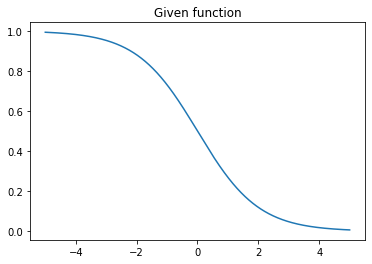

In [252]:
def test_logistic_function(x):
    return 1/(1+np.exp(x))
x=np.arange(-5,5,0.001)
plt.plot(x,test_logistic_function(x));
plt.title('Given function')

In [0]:
model = LogisticRegression(lr=0.03, num_iter=100000)

In [237]:
X=np.squeeze(np.asarray(X))
model.fit(X, y)

loss: -0.6852092706531187 	
loss: -0.5560127110123599 	
loss: -0.5560127110122023 	
loss: -0.5560127110122023 	
loss: -0.5560127110122023 	
loss: -0.5560127110122023 	
loss: -0.5560127110122023 	
loss: -0.5560127110122023 	
loss: -0.5560127110122023 	
loss: -0.5560127110122023 	


In [241]:
preds = model.predict(X)
print('Accuracy of LDA is',(preds == y).mean())

Accuracy of LDA is 0.6866866866866866


In [242]:
model.theta

array([-0.39583004,  0.97945996,  0.40436548])

Text(0.5, 1.0, 'Decision boundary - Logistic Regression')

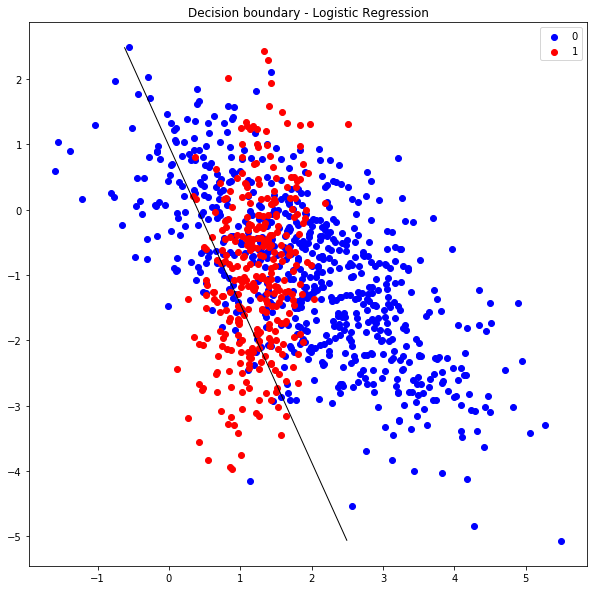

In [243]:
X=np.squeeze(np.asarray(X))
plt.figure(figsize=(10, 10))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
plt.title("Decision boundary - Logistic Regression")

Samples from GMM : (999, 2)
Class labels of the GMM : (999,)
Accuracy of MAP is : 0.7887887887887888


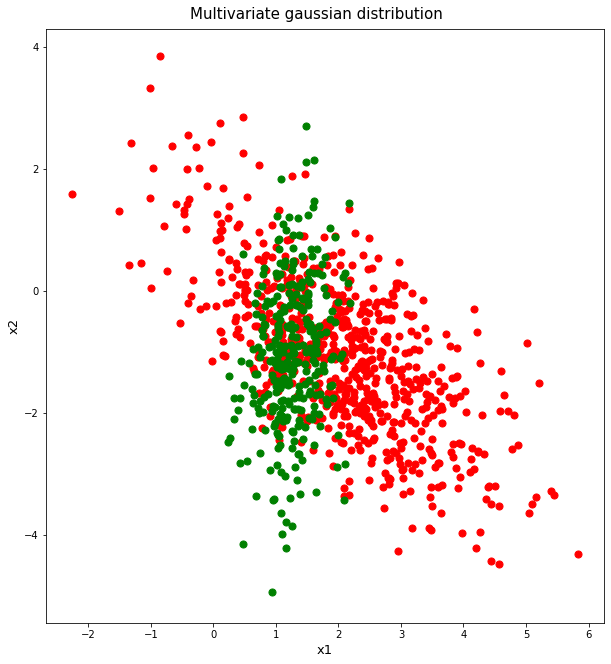

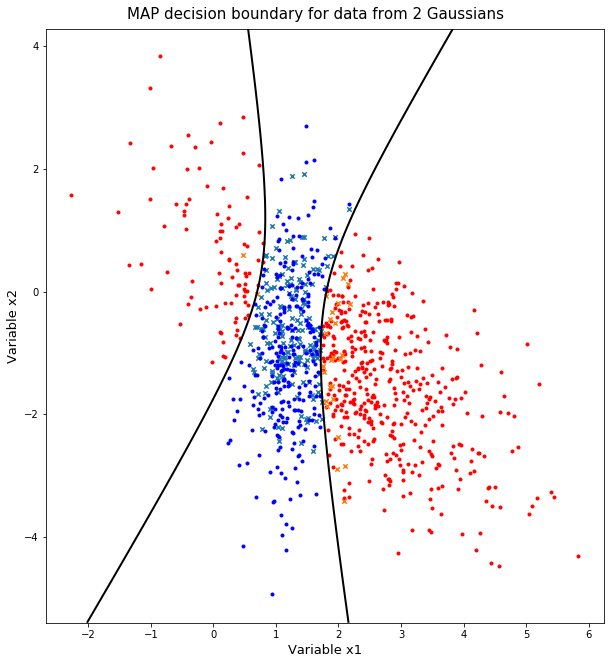

In [254]:
def plot_map(X,y,y_pred):
    from matplotlib.pyplot import figure
    fig = plt.figure(figsize=(10,10));
    plt.xlabel('Variable x1',size=13)
    plt.ylabel('Variable x2',size=13)
    fig.suptitle('MAP decision boundary for data from 2 Gaussians', fontsize=15)
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1] # True Positive for class 0 and class 1 respectively
    # tp0 is boolean with "tp and class=0"
    X0, X1 = X[y == 0], X[y == 1] # points 
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20)  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20)  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))


    Z = (gaussian1.pdf((np.c_[xx.ravel(), yy.ravel()]))*prior[1])/((gaussian2.pdf((np.c_[xx.ravel(), yy.ravel()]))*prior[1])+(gaussian1.pdf((np.c_[xx.ravel(), yy.ravel()]))*prior[1]))
    Z=Z.reshape(xx.shape)

    #plt.pcolormesh(xx, yy,                zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black');
    plt.subplots_adjust(top=.95);
    # Re writing true priors-


sig1=[[1.5,1],[-1,1.5]]
u1=[2,-1]

# mean and covariance of gaussian 2
sig2=[[.15,.1],[.1,1.5]]
u2=[1.2,-1]
X,y=generate_GMM_samples_2class(prior=prior,number_of_samples=999,sig1=sig1,sig2=sig2,u1=u1,u2=u2);

print ("Samples from GMM :",X.shape)
print ("Class labels of the GMM :",y.shape)

gaussian1 = multivariate_normal(mean=u1, cov=sig1)
gaussian2 = multivariate_normal(mean=u2, cov=sig2)

class1_posterior=(gaussian1.pdf(X)*prior[0])/((gaussian1.pdf(X)*prior[0])+(gaussian2.pdf(X)*prior[0]))
class2_posterior=(gaussian2.pdf(X)*prior[0])/((gaussian1.pdf(X)*prior[0])+(gaussian2.pdf(X)*prior[0]))

class1_class2_posterior_stacked=np.vstack([class1_posterior,class2_posterior]).T

y_pred=np.argmax(class1_class2_posterior_stacked,axis=1)


print ("Accuracy of MAP is :",np.mean(y==y_pred))

plot_map(X,y,y_pred)

MAP classifier performed better for the distribution above with accuracy close to 78%. For the same distribution LDA and Logistic Regression have accuracy about 68%. The reason being, MAP has knowledge about the distribution.